In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
# Load the data for the 12 drivers
data = pd.read_excel('Acceleration1.xlsx', sheet_name='1')

In [3]:
data.head()

Driver No.  Average Acceleration during parallel parking (m/s^2)   
0           1                                              0.360     \
1           2                                              0.801      
2           3                                              0.728      
3           4                                              0.519      
4           5                                              0.689      

   Median Acceleration during parallel parking (m/s^2)   
0                                               0.33    \
1                                               0.78     
2                                               0.53     
3                                               0.44     
4                                               0.63     

   Std. Dev. Acceleration during parallel parking (m/s^2)   
0                                           0.215516       \
1                                           0.343633        
2                                           0.589700        
3                                           0.535563        
4                                           0.341867        

   Time to finish the parallel parking (sec)  
0                                      60.00  
1                                      50.00  
2                                      65.45  
3                                      67.00  
4                                      66.00

In [4]:
# Define the features and labels
X = data.iloc[:, 1:].values  # select all columns except for the first column as features
y = data.iloc[:, 0].values   # select the first column as the label

In [5]:
# Reduce the features to 2 using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Train the SVM classifier
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
# Predict the labels of the four additional drivers
new_data = pd.read_excel('Acceleration1.xlsx', sheet_name='2')
X_new = new_data.iloc[:, 1:].values  # select all columns except for the first column
X_new_pca = pca.transform(X_new)  # apply PCA to the new data as well
y_pred = clf.predict(X_new_pca)
print(X_new_pca)

[[-2.80323270e+01 -7.43601108e-01]
 [-3.77977241e+01  2.99748186e-01]
 [-2.37950472e+01  4.34274119e-02]
 [-7.47903747e+01 -6.26815662e-01]]


In [9]:
new_data.head()

Driver No.  Average Acceleration during parallel parking (m/s^2)   
0          A                                              1.215     \
1          B                                              0.274      
2          C                                              0.521      
3          D                                              0.743      

   Median Acceleration during parallel parking (m/s^2)   
0                                           0.620000    \
1                                           0.212213     
2                                           0.450000     
3                                           0.640000     

   Std. Dev. Acceleration during parallel parking (m/s^2)   
0                                           1.861647       \
1                                           0.242149        
2                                           0.417478        
3                                           0.551393        

   Time to finish the parallel parking (sec)  
0                                      80.25  
1                                      90.00  
2                                      76.00  
3                                     127.00

In [25]:
# Calculate the distances of the additional drivers from the hyperplane
distances = clf.decision_function(X_new_pca)
min_distance = distances.min()
max_distance = distances.max()
scalar_distances = 1 - (distances - min_distance) / (max_distance - min_distance)
print(distances)
print(min_distance)
print(scalar_distances)

[[ 6.32275449  4.32080361  7.28694274  8.32466125  3.31588686  0.67073841
  -0.32569342  2.3141811   4.69503389]
 [ 6.3256015   4.32297979  7.27478602  8.32781791  3.31882271  0.66981585
  -0.32725064  2.31660874  4.68277639]
 [ 6.32101208  4.31949206  7.28938368  8.32187934  3.3148646   0.67131041
  -0.32473728  2.31261324  4.70634999]
 [ 6.3294019   4.32713171  7.00615571  8.33100145  3.32385719  0.66837232
  -0.32990179  2.32235744  4.67301831]]
-0.329901789506131
[[2.31875002e-01 4.63023050e-01 1.20548479e-01 7.32047935e-04
  5.79052144e-01 8.84464683e-01 9.99514095e-01 6.94710492e-01
  4.19813899e-01]
 [2.31546282e-01 4.62771786e-01 1.21952111e-01 3.67575387e-04
  5.78713167e-01 8.84571203e-01 9.99693895e-01 6.94430193e-01
  4.21229167e-01]
 [2.32076183e-01 4.63174484e-01 1.20266644e-01 1.05325129e-03
  5.79170176e-01 8.84398639e-01 9.99403698e-01 6.94891519e-01
  4.18507326e-01]
 [2.31107482e-01 4.62292399e-01 1.52968541e-01 0.00000000e+00
  5.78131878e-01 8.84737875e-01 1.000000

Text(0, 0.5, 'Principal Component 2')

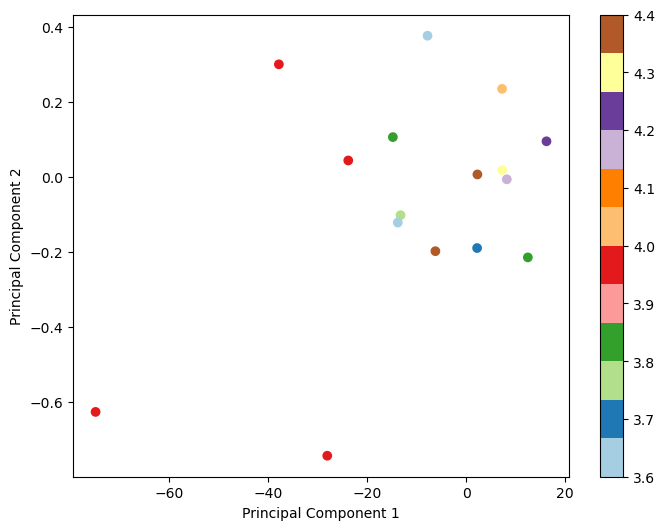

In [22]:
# Plot the decision boundary and the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, label='Testing Data')
plt.scatter(X_new_pca[:, 0], X_new_pca[:, 1], c=y_pred, cmap=plt.cm.Paired, label='New Drivers')
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

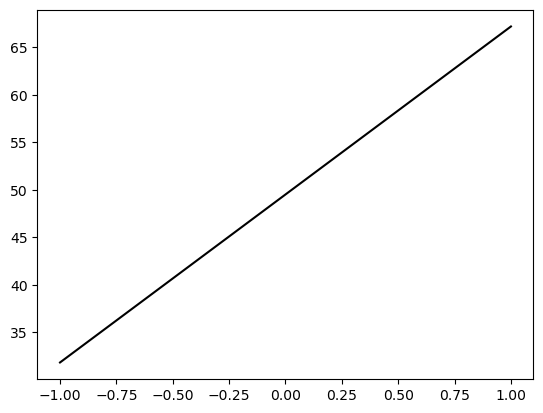

In [23]:
# Plot the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 1)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')